In [1]:
# Math 
from math import sqrt
from scipy import stats
import statistics
import os

# General
import numpy as np
import pandas as pd

# Sklearn Modeling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Visuals
import matplotlib.pyplot as plt
import seaborn as sns
from graphviz import Graph
from tabulate import tabulate

# Custom Module's
from acquire import get_telco_data, get_data_dictionary, get_target
from prepare import prep_telco_data, clean_telco
import explore


import warnings
warnings.filterwarnings("ignore")

# Explore

In [2]:
# Clean for explore, does everything prep does except for creating dummies.  
# This leaves me with more readable values.

def clean_for_explore():
    df = get_telco_data() # grabbing the telco data
    df = df.drop_duplicates() # Dropping Duplicates
    df = df.drop(columns = ['customer_id']) # Don't need this column
    
    # If total charges are null, then remove the entire row 
    list_of_null_indexs = list(df[df.total_charges.str.contains(" ")].index)
    df = df.drop(list_of_null_indexs)
    
    # Convert total_charges from datatype object to float
    total_charges = df.total_charges.astype("float")
    df = df.drop(columns='total_charges')
    df = pd.concat([df, total_charges], axis = 1)
    
    # In the three lines below are mapping out the current values for what they actually represent.
    payment = df.payment_type_id.map({1: 'Electronic check', 2: 'Mailed check', 3:'Bank transder', 4:'Credit card'})
    internet = df.internet_service_type_id.map({1: 'DSL', 2: 'Fiber optic', 3:'None'})
    contract = df.contract_type_id .map({1: 'Month-to-month', 2: 'One year', 3:'Two year'})
    
    # In the three lines below im adding each series to my dataframe and renaming the columns
    df = pd.concat([df, payment.rename("payment")], axis = 1)
    df = pd.concat([df, internet.rename("internet_service")], axis = 1)
    df = pd.concat([df, contract.rename("contract")], axis = 1)
    
    df = df.drop(columns=['payment_type_id', 'payment_type_id.1','contract_type_id', 'payment_type', 'contract_type', 'contract_type_id.1', 'internet_service_type_id', 'internet_service_type', 'internet_service_type_id.1'])
    return df

In [136]:
df = clean_for_explore()

In [130]:
categ = df.nunique()[df.nunique() <= 5].index
list(categ)

['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'churn',
 'payment',
 'internet_service',
 'contract']

In [131]:
cat_vars = ['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'churn',
 'payment',
 'internet_service',
 'contract']
quant_vars = ['total_charges', 'tenure', 'monthly_charges']

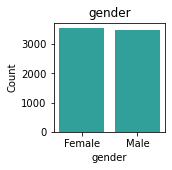

        gender  Count  Percent
Male    Female   3549    50.47
Female    Male   3483    49.53
_________________________________________________________________


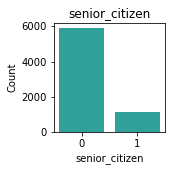

   senior_citizen  Count  Percent
0               0   5890    83.76
1               1   1142    16.24
_________________________________________________________________


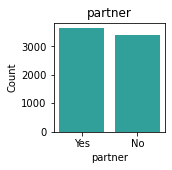

    partner  Count  Percent
No      Yes   3639    51.75
Yes      No   3393    48.25
_________________________________________________________________


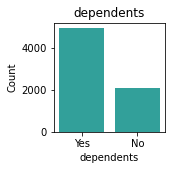

    dependents  Count  Percent
No         Yes   4933    70.15
Yes         No   2099    29.85
_________________________________________________________________


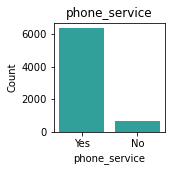

    phone_service  Count  Percent
Yes           Yes   6352    90.33
No             No    680     9.67
_________________________________________________________________


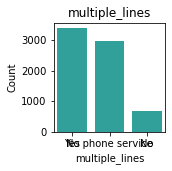

                    multiple_lines  Count  Percent
No                             Yes   3385    48.14
Yes               No phone service   2967    42.19
No phone service                No    680     9.67
_________________________________________________________________


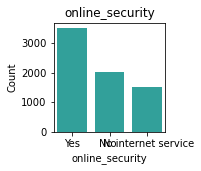

                         online_security  Count  Percent
No                                   Yes   3497    49.73
Yes                                   No   2015    28.65
No internet service  No internet service   1520    21.62
_________________________________________________________________


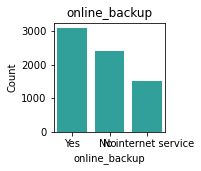

                           online_backup  Count  Percent
No                                   Yes   3087    43.90
Yes                                   No   2425    34.49
No internet service  No internet service   1520    21.62
_________________________________________________________________


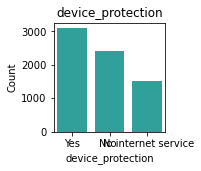

                       device_protection  Count  Percent
No                                   Yes   3094    44.00
Yes                                   No   2418    34.39
No internet service  No internet service   1520    21.62
_________________________________________________________________


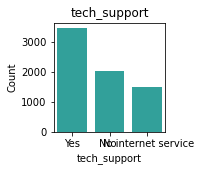

                            tech_support  Count  Percent
No                                   Yes   3472    49.37
Yes                                   No   2040    29.01
No internet service  No internet service   1520    21.62
_________________________________________________________________


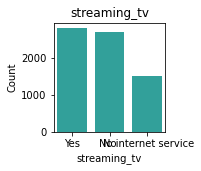

                            streaming_tv  Count  Percent
No                                   Yes   2809    39.95
Yes                                   No   2703    38.44
No internet service  No internet service   1520    21.62
_________________________________________________________________


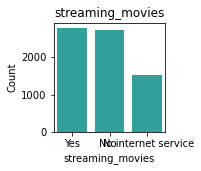

                        streaming_movies  Count  Percent
No                                   Yes   2781    39.55
Yes                                   No   2731    38.84
No internet service  No internet service   1520    21.62
_________________________________________________________________


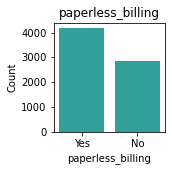

    paperless_billing  Count  Percent
Yes               Yes   4168    59.27
No                 No   2864    40.73
_________________________________________________________________


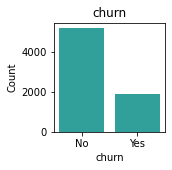

    churn  Count  Percent
No     No   5163    73.42
Yes   Yes   1869    26.58
_________________________________________________________________


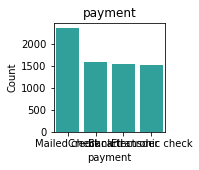

                           payment  Count  Percent
Electronic check      Mailed check   2365    33.63
Mailed check           Credit card   1604    22.81
Bank transder        Bank transder   1542    21.93
Credit card       Electronic check   1521    21.63
_________________________________________________________________


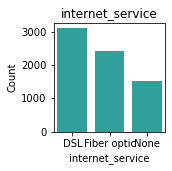

            internet_service  Count  Percent
Fiber optic              DSL   3096    44.03
DSL              Fiber optic   2416    34.36
None                    None   1520    21.62
_________________________________________________________________


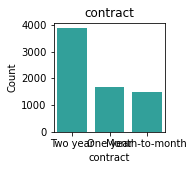

                      contract  Count  Percent
Month-to-month        Two year   3875    55.11
Two year              One year   1685    23.96
One year        Month-to-month   1472    20.93
_________________________________________________________________


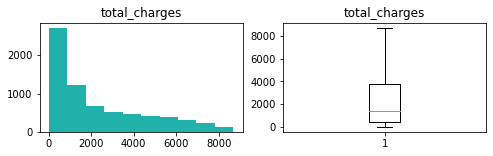

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: total_charges, dtype: float64


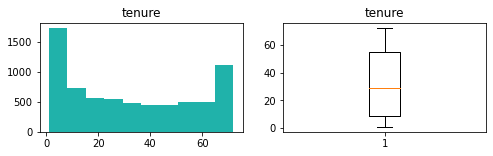

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


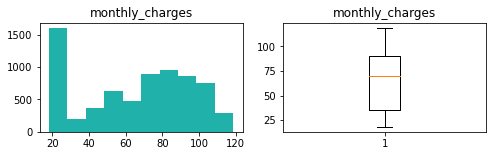

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: monthly_charges, dtype: float64


In [132]:
explore.explore_univariate(df, cat_vars, quant_vars)

I asked what features have a low sample size.
When exploring explore.explore_univariate(df, cat_vars, quant_vars), I found: 

- senior_citizen 
- dependents
- phone service

These will dropped. 

Now that we have used explore_univariate, we can encode our data to run bivariate

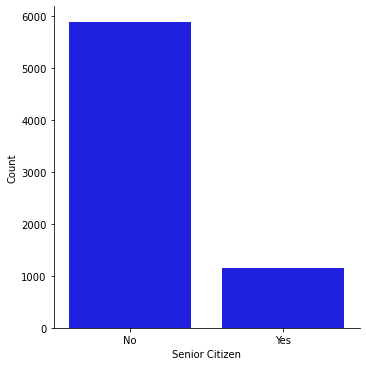

In [137]:
senior = df.senior_citizen.map({1: "Yes", 0: "No"})
df = pd.concat([df, senior.rename("senior")], axis = 1)

x = sns.catplot(x="senior", kind="count", color="blue", data=df)
x.set_axis_labels('Senior Citizen', 'Count')

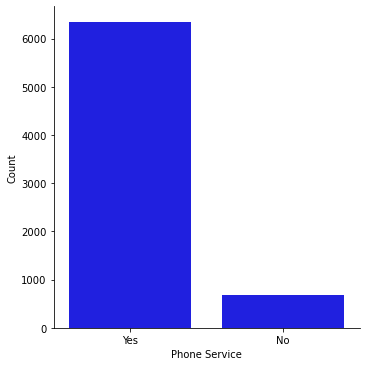

In [134]:
x = sns.catplot(x="phone_service", kind="count", color="blue", data=df)
x.set_axis_labels('Phone Service', 'Count')

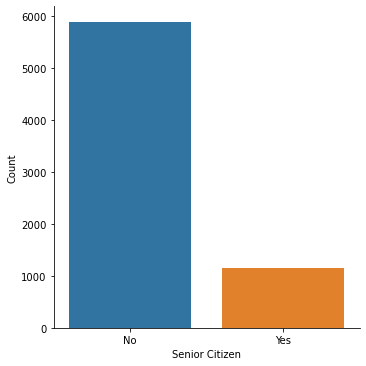

In [92]:
x = sns.catplot(x="senior", kind="count", data=df, color="blue")
x.set_axis_labels('Senior Citizen', 'Count')

In [126]:
df = clean_telco(get_telco_data())

In [95]:
# creating a category variable to hold my column names
categ = df.nunique()[df.nunique() <= 5].index

In [96]:
cat_vars = list(categ)
quant_vars = ['total_charges', 'tenure', 'monthly_charges']

In [127]:
gender = df.gender_Male.map({1: "Male", 0: "Female"})
df = pd.concat([df, gender.rename("gender")], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7032 non-null   int64  
 1   monthly_charges                        7032 non-null   float64
 2   total_charges                          7032 non-null   float64
 3   gender_Male                            7032 non-null   uint8  
 4   partner_Yes                            7032 non-null   uint8  
 5   dependents_Yes                         7032 non-null   uint8  
 6   phone_service_Yes                      7032 non-null   uint8  
 7   paperless_billing_Yes                  7032 non-null   uint8  
 8   churn                                  7032 non-null   uint8  
 9   senior_Yes                             7032 non-null   uint8  
 10  multiple_lines_No                      7032 non-null   uint8  
 11  mult

[Text(0.5, 0, 'Gender'), Text(0, 0.5, 'Churn')]

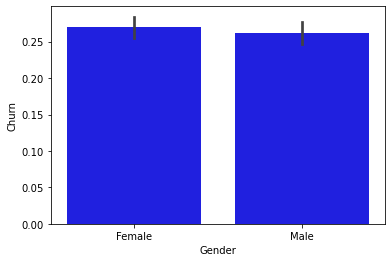

In [128]:
x = sns.barplot(x="gender", y="churn", data=df, color="blue")
x.set(xlabel="Gender", ylabel = "Churn")

In [124]:
df = clean_telco(get_telco_data())
device = df.device_protection_Yes.map({1: "Yes", 0: "No"})
df = pd.concat([df, device.rename("device")], axis = 1)

[Text(0.5, 0, 'Device Protection'), Text(0, 0.5, 'Churn')]

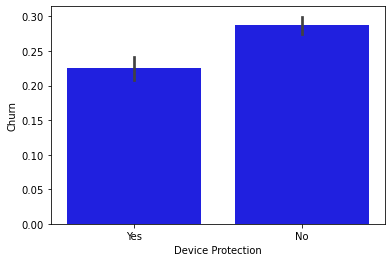

In [125]:
x = sns.barplot(x="device", y="churn", data=df, color="blue")
x.set(xlabel="Device Protection", ylabel = "Churn")

[Text(0.5, 0, 'Fiber'), Text(0, 0.5, 'Churn')]

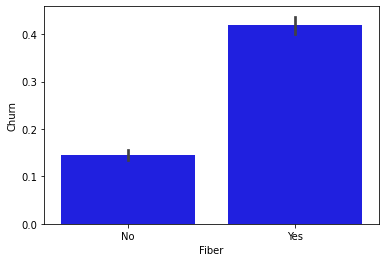

In [122]:
df = clean_telco(get_telco_data())
fiber = df['internet_service_Fiber optic'].map({1: "Yes", 0: "No"})
df = pd.concat([df, fiber.rename("fiber")], axis = 1)
x = sns.barplot(x="fiber", y="churn", data=df, color="blue")
x.set(xlabel="Fiber", ylabel = "Churn")

gender_Male 
_____________________

       chi2   p-value  degrees of freedom
0  0.475455  0.490488                   1

observed:
 churn           0     1   All
gender_Male                  
0            2544   939  3483
1            2619   930  3549
All          5163  1869  7032

expected:
              0           1
0  2557.270904  925.729096
1  2605.729096  943.270904


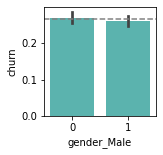


_____________________

partner_Yes 
_____________________

         chi2       p-value  degrees of freedom
0  157.503151  3.973798e-36                   1

observed:
 churn           0     1   All
partner_Yes                  
0            2439  1200  3639
1            2724   669  3393
All          5163  1869  7032

expected:
              0           1
0  2671.808447  967.191553
1  2491.191553  901.808447


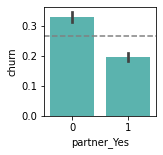


_____________________

paperless_billing_Yes 
_____________________

         chi2       p-value  degrees of freedom
0  256.874908  8.236203e-58                   1

observed:
 churn                     0     1   All
paperless_billing_Yes                  
0                      2395   469  2864
1                      2768  1400  4168
All                    5163  1869  7032

expected:
              0            1
0  2102.791809   761.208191
1  3060.208191  1107.791809


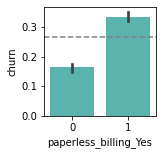


_____________________

churn 
_____________________

          chi2  p-value  degrees of freedom
0  7026.876495      0.0                   1

observed:
 churn     0     1   All
churn                  
0      5163     0  5163
1         0  1869  1869
All    5163  1869  7032

expected:
              0            1
0  3790.752133  1372.247867
1  1372.247867   496.752133


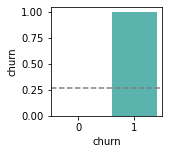


_____________________

multiple_lines_No 
_____________________

       chi2   p-value  degrees of freedom
0  7.350714  0.006704                   1

observed:
 churn                 0     1   All
multiple_lines_No                  
0                  2627  1020  3647
1                  2536   849  3385
All                5163  1869  7032

expected:
              0           1
0  2677.682167  969.317833
1  2485.317833  899.682167


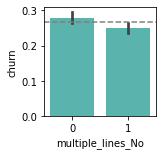


_____________________

multiple_lines_No phone service 
_____________________

       chi2   p-value  degrees of freedom
0  0.873733  0.349924                   1

observed:
 churn                               0     1   All
multiple_lines_No phone service                  
0                                4653  1699  6352
1                                 510   170   680
All                              5163  1869  7032

expected:
              0            1
0  4663.733788  1688.266212
1   499.266212   180.733788


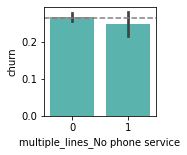


_____________________

multiple_lines_Yes 
_____________________

        chi2   p-value  degrees of freedom
0  11.086876  0.000869                   1

observed:
 churn                  0     1   All
multiple_lines_Yes                  
0                   3046  1019  4065
1                   2117   850  2967
All                 5163  1869  7032

expected:
              0            1
0  2984.584044  1080.415956
1  2178.415956   788.584044


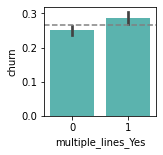


_____________________

online_security_No 
_____________________

         chi2        p-value  degrees of freedom
0  822.073779  8.568504e-181                   1

observed:
 churn                  0     1   All
online_security_No                  
0                   3127   408  3535
1                   2036  1461  3497
All                 5163  1869  7032

expected:
              0           1
0  2595.450085  939.549915
1  2567.549915  929.450085


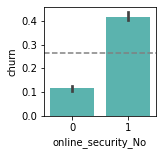


_____________________

online_security_No internet service 
_____________________

         chi2       p-value  degrees of freedom
0  362.947849  6.422521e-81                   1

observed:
 churn                                   0     1   All
online_security_No internet service                  
0                                    3756  1756  5512
1                                    1407   113  1520
All                                  5163  1869  7032

expected:
              0            1
0  4046.993174  1465.006826
1  1116.006826   403.993174


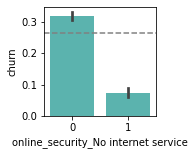


_____________________

online_security_Yes 
_____________________

         chi2       p-value  degrees of freedom
0  205.415787  1.374240e-46                   1

observed:
 churn                   0     1   All
online_security_Yes                  
0                    3443  1574  5017
1                    1720   295  2015
All                  5163  1869  7032

expected:
              0            1
0  3683.556741  1333.443259
1  1479.443259   535.556741


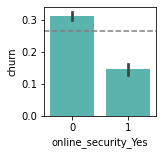


_____________________

online_backup_No 
_____________________

         chi2        p-value  degrees of freedom
0  502.321566  2.970618e-111                   1

observed:
 churn                0     1   All
online_backup_No                  
0                 3309   636  3945
1                 1854  1233  3087
All               5163  1869  7032

expected:
              0            1
0  2896.478242  1048.521758
1  2266.521758   820.478242


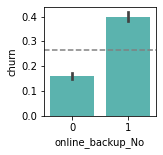


_____________________

online_backup_No internet service 
_____________________

         chi2       p-value  degrees of freedom
0  362.947849  6.422521e-81                   1

observed:
 churn                                 0     1   All
online_backup_No internet service                  
0                                  3756  1756  5512
1                                  1407   113  1520
All                                5163  1869  7032

expected:
              0            1
0  4046.993174  1465.006826
1  1116.006826   403.993174


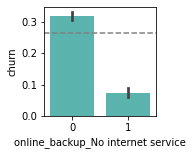


_____________________

online_backup_Yes 
_____________________

        chi2       p-value  degrees of freedom
0  47.246659  6.259257e-12                   1

observed:
 churn                 0     1   All
online_backup_Yes                  
0                  3261  1346  4607
1                  1902   523  2425
All                5163  1869  7032

expected:
              0            1
0  3382.528584  1224.471416
1  1780.471416   644.528584


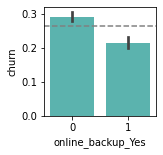


_____________________

device_protection_No 
_____________________

         chi2       p-value  degrees of freedom
0  445.608558  6.513662e-99                   1

observed:
 churn                    0     1   All
device_protection_No                  
0                     3280   658  3938
1                     1883  1211  3094
All                   5163  1869  7032

expected:
              0            1
0  2891.338737  1046.661263
1  2271.661263   822.338737


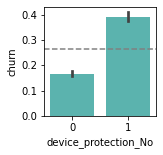


_____________________

device_protection_No internet service 
_____________________

         chi2       p-value  degrees of freedom
0  362.947849  6.422521e-81                   1

observed:
 churn                                     0     1   All
device_protection_No internet service                  
0                                      3756  1756  5512
1                                      1407   113  1520
All                                    5163  1869  7032

expected:
              0            1
0  4046.993174  1465.006826
1  1116.006826   403.993174


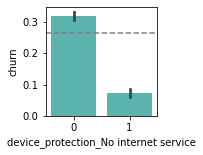


_____________________

device_protection_Yes 
_____________________

        chi2       p-value  degrees of freedom
0  30.495699  3.346075e-08                   1

observed:
 churn                     0     1   All
device_protection_Yes                  
0                      3290  1324  4614
1                      1873   545  2418
All                    5163  1869  7032

expected:
              0            1
0  3387.668089  1226.331911
1  1775.331911   642.668089


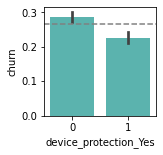


_____________________

tech_support_No 
_____________________

         chi2        p-value  degrees of freedom
0  796.510254  3.095970e-175                   1

observed:
 churn               0     1   All
tech_support_No                  
0                3137   423  3560
1                2026  1446  3472
All              5163  1869  7032

expected:
              0           1
0  2613.805461  946.194539
1  2549.194539  922.805461


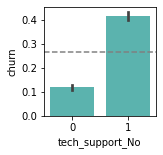


_____________________

tech_support_No internet service 
_____________________

         chi2       p-value  degrees of freedom
0  362.947849  6.422521e-81                   1

observed:
 churn                                0     1   All
tech_support_No internet service                  
0                                 3756  1756  5512
1                                 1407   113  1520
All                               5163  1869  7032

expected:
              0            1
0  4046.993174  1465.006826
1  1116.006826   403.993174


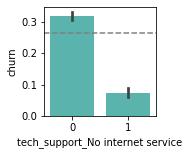


_____________________

tech_support_Yes 
_____________________

         chi2       p-value  degrees of freedom
0  189.966754  3.232868e-43                   1

observed:
 churn                0     1   All
tech_support_Yes                  
0                 3433  1559  4992
1                 1730   310  2040
All               5163  1869  7032

expected:
              0            1
0  3665.201365  1326.798635
1  1497.798635   542.201365


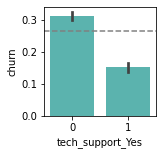


_____________________

streaming_tv_No 
_____________________

         chi2       p-value  degrees of freedom
0  115.403905  6.419558e-27                   1

observed:
 churn               0     1   All
streaming_tv_No                  
0                3296   927  4223
1                1867   942  2809
All              5163  1869  7032

expected:
              0            1
0  3100.590017  1122.409983
1  2062.409983   746.590017


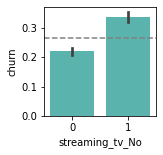


_____________________

streaming_tv_No internet service 
_____________________

         chi2       p-value  degrees of freedom
0  362.947849  6.422521e-81                   1

observed:
 churn                                0     1   All
streaming_tv_No internet service                  
0                                 3756  1756  5512
1                                 1407   113  1520
All                               5163  1869  7032

expected:
              0            1
0  4046.993174  1465.006826
1  1116.006826   403.993174


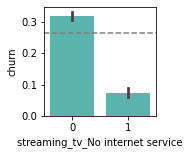


_____________________

streaming_tv_Yes 
_____________________

       chi2       p-value  degrees of freedom
0  27.84191  1.316434e-07                   1

observed:
 churn                0     1   All
streaming_tv_Yes                  
0                 3274  1055  4329
1                 1889   814  2703
All               5163  1869  7032

expected:
              0            1
0  3178.416809  1150.583191
1  1984.583191   718.416809


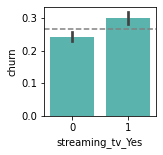


_____________________

streaming_movies_No 
_____________________

        chi2       p-value  degrees of freedom
0  119.92399  6.573167e-28                   1

observed:
 churn                   0     1   All
streaming_movies_No                  
0                    3320   931  4251
1                    1843   938  2781
All                  5163  1869  7032

expected:
              0            1
0  3121.148038  1129.851962
1  2041.851962   739.148038


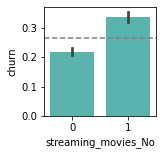


_____________________

streaming_movies_No internet service 
_____________________

         chi2       p-value  degrees of freedom
0  362.947849  6.422521e-81                   1

observed:
 churn                                    0     1   All
streaming_movies_No internet service                  
0                                     3756  1756  5512
1                                     1407   113  1520
All                                   5163  1869  7032

expected:
              0            1
0  4046.993174  1465.006826
1  1116.006826   403.993174


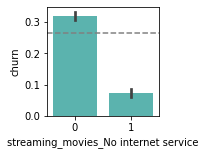


_____________________

streaming_movies_Yes 
_____________________

        chi2       p-value  degrees of freedom
0  25.764141  3.857900e-07                   1

observed:
 churn                    0     1   All
streaming_movies_Yes                  
0                     3250  1051  4301
1                     1913   818  2731
All                   5163  1869  7032

expected:
              0            1
0  3157.858788  1143.141212
1  2005.141212   725.858788


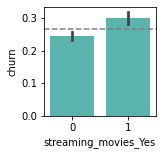


_____________________

payment_Bank transfer 
_____________________

        chi2       p-value  degrees of freedom
0  97.494125  5.401629e-23                   1

observed:
 churn                     0     1   All
payment_Bank transfer                  
0                      3879  1611  5490
1                      1284   258  1542
All                    5163  1869  7032

expected:
              0            1
0  4030.840444  1459.159556
1  1132.159556   409.840444


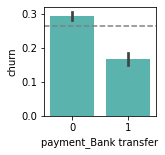


_____________________

payment_Credit card 
_____________________

         chi2       p-value  degrees of freedom
0  126.824843  2.029148e-29                   1

observed:
 churn                   0     1   All
payment_Credit card                  
0                    3874  1637  5511
1                    1289   232  1521
All                  5163  1869  7032

expected:
              0            1
0  4046.258959  1464.741041
1  1116.741041   404.258959


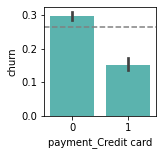


_____________________

payment_Electronic check 
_____________________

         chi2        p-value  degrees of freedom
0  637.588697  1.117802e-140                   1

observed:
 churn                        0     1   All
payment_Electronic check                  
0                         3869   798  4667
1                         1294  1071  2365
All                       5163  1869  7032

expected:
              0            1
0  3426.581485  1240.418515
1  1736.418515   628.581485


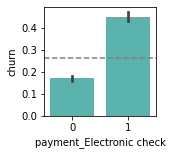


_____________________

payment_Mailed check 
_____________________

        chi2       p-value  degrees of freedom
0  57.452966  3.461589e-14                   1

observed:
 churn                    0     1   All
payment_Mailed check                  
0                     3867  1561  5428
1                     1296   308  1604
All                   5163  1869  7032

expected:
              0            1
0  3985.319113  1442.680887
1  1177.680887   426.319113


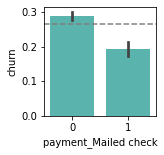


_____________________

internet_service_DSL 
_____________________

         chi2       p-value  degrees of freedom
0  107.779874  3.003509e-25                   1

observed:
 churn                    0     1   All
internet_service_DSL                  
0                     3206  1410  4616
1                     1957   459  2416
All                   5163  1869  7032

expected:
              0            1
0  3389.136519  1226.863481
1  1773.863481   642.136519


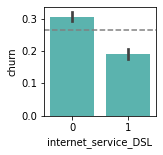


_____________________

internet_service_Fiber optic 
_____________________

         chi2        p-value  degrees of freedom
0  663.356457  2.782210e-146                   1

observed:
 churn                            0     1   All
internet_service_Fiber optic                  
0                             3364   572  3936
1                             1799  1297  3096
All                           5163  1869  7032

expected:
              0            1
0  2889.870307  1046.129693
1  2273.129693   822.870307


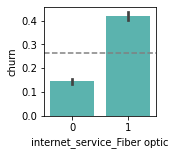


_____________________

internet_service_None 
_____________________

         chi2       p-value  degrees of freedom
0  362.947849  6.422521e-81                   1

observed:
 churn                     0     1   All
internet_service_None                  
0                      3756  1756  5512
1                      1407   113  1520
All                    5163  1869  7032

expected:
              0            1
0  4046.993174  1465.006826
1  1116.006826   403.993174


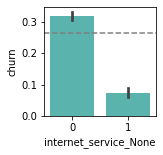


_____________________

contract_Month-to-month 
_____________________

          chi2        p-value  degrees of freedom
0  1149.104315  7.023468e-252                   1

observed:
 churn                       0     1   All
contract_Month-to-month                  
0                        2943   214  3157
1                        2220  1655  3875
All                      5163  1869  7032

expected:
              0            1
0  2317.916809   839.083191
1  2845.083191  1029.916809


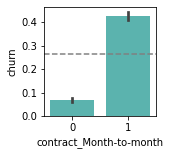


_____________________

contract_One year 
_____________________

         chi2       p-value  degrees of freedom
0  222.374968  2.743815e-50                   1

observed:
 churn                 0     1   All
contract_One year                  
0                  3857  1703  5560
1                  1306   166  1472
All                5163  1869  7032

expected:
              0            1
0  4082.235495  1477.764505
1  1080.764505   391.235495


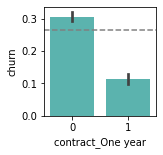


_____________________

contract_Two year 
_____________________

         chi2        p-value  degrees of freedom
0  637.848351  9.815072e-141                   1

observed:
 churn                 0     1   All
contract_Two year                  
0                  3526  1821  5347
1                  1637    48  1685
All                5163  1869  7032

expected:
              0            1
0  3925.847696  1421.152304
1  1237.152304   447.847696


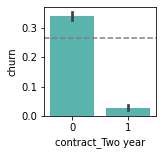


_____________________

total_charges 
____________________



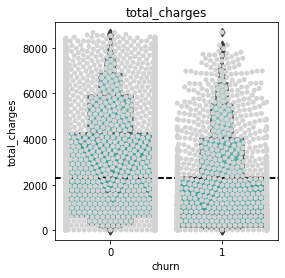

        count         mean          std    min      25%      50%       75%  \
churn                                                                        
0      5163.0  2555.344141  2329.456984  18.80  577.825  1683.60  4264.125   
1      1869.0  1531.796094  1890.822994  18.85  134.500   703.55  2331.300   

           max  
churn           
0      8672.45  
1      8684.80   


Mann-Whitney Test:
 MannwhitneyuResult(statistic=6288982.0, pvalue=1.9959848938845826e-84)

____________________

tenure 
____________________



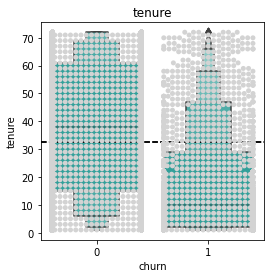

        count       mean        std  min   25%   50%   75%   max
churn                                                           
0      5163.0  37.650010  24.076940  1.0  15.0  38.0  61.0  72.0
1      1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=7154668.0, pvalue=6.043046580882717e-211)

____________________

monthly_charges 
____________________



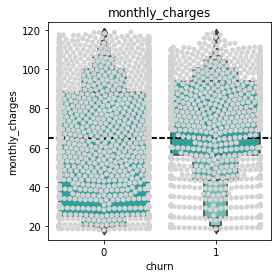

        count       mean        std    min    25%    50%     75%     max
churn                                                                   
0      5163.0  61.307408  31.094557  18.25  25.10  64.45  88.475  118.75
1      1869.0  74.441332  24.666053  18.85  56.15  79.65  94.200  118.35 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=3663498.5, pvalue=8.467195044548749e-54)

____________________



In [23]:
explore.explore_bivariate(df, 'churn', cat_vars, quant_vars)

When exploring explore.explore_bivariate(df, 'churn', cat_vars, quant_vars), I found that:

gender_Male churn rate: equal 

partner_Yes churn rate: low

dependets_Yes churn rate: low

phone_service_Yes churn rate: equal

paperless_billing_Yes churn rate: high

senior_Yes churn rate: high

multiple_lines_No churn rate: equal

multiple_lines_No phone serive churn rate: equal

multiple_lines_Yes churn rate: equal

online_security_No churn rate: higher

online_securtiy_No internet service churn rate: low

online_security_Yes: low

online_backup_No: high

online_backup_No internet service: low

online_backup_Yes: low

device_protection_No: high

device_protection_No internet service: low 

device_protection_Yes: low

tech_support_No: high

tech_support_No internet service: low

tech_support_Yes: low

streaming_tv_No: high

streaming_tv_No internet service: low

streaming_tv_Yes: high

streaming_movies_No: high

streaming_movies_No internet service: low

streaming_movies_Yes: high

contract_type_Month-to-month: High

contract_type_One year: low

contract_type_Two year: low

payment_Bank transfer: low

payment_Credit card: low

payment_Electronic check: High

payment_Mailed check: low

internet_Service_DSL: low

internet_Service_Fiber: high

internet_Service_No internet service: low

I asked which features have a high or low rate of churn?  Which ones have equal rates?

- My strategy is looking for high or low churn, where the features are equal or the same. im going to drop them.
- going to take out no internet service for services like streaming_movies, tv, tech support, etc... since they all have low churn rate and my column has no internet already accounts for this.
- streaming tv and streaming movies both had high churn rate, so I dont think I will use this in my model.
- multiple lines no/yes/no internet, phone_service_Yes, and gender_male were equal churn rate so they will be dropped
- For services, we dont need both yes and no, dropping

I am dropping.
- gender_male

- online_securtiy_No internet service
- online_backup_No internet service
- device_protection_No internet service
- tech_support_No internet service

- online_security_No
- online_backup_No
- device_protection_No
- tech_support_No

- multiple_lines_No 
- multiple_lines_No phone serive 
- multiple_lines_Yes

- streaming_tv_No
- streaming_tv_No internet service
- streaming_tv_Yes
- streaming_movies_No
- streaming_movies_No internet service
- streaming_movies_Yes

In [144]:
df = clean_telco(get_telco_data())

In [145]:
# 41 columns to 20 
df = df.drop(columns=['senior_Yes',
                      'dependents_Yes', 
                      'phone_service_Yes',
                      'gender_Male',
                      'online_security_No', 'online_security_No internet service',
                      'online_backup_No', 'online_backup_No internet service',
                      'device_protection_No', 'device_protection_No internet service',
                      'tech_support_No', 'tech_support_No internet service',
                      'streaming_tv_No', 'streaming_tv_No internet service', 'streaming_tv_Yes',
                      'streaming_movies_No', 'streaming_movies_No internet service', 'streaming_movies_Yes',
                      'multiple_lines_No', 'multiple_lines_No phone service', 'multiple_lines_Yes'])

In [147]:
df.columns

Index(['tenure', 'monthly_charges', 'total_charges', 'partner_Yes',
       'paperless_billing_Yes', 'churn', 'online_security_Yes',
       'online_backup_Yes', 'device_protection_Yes', 'tech_support_Yes',
       'payment_Bank transfer', 'payment_Credit card',
       'payment_Electronic check', 'payment_Mailed check',
       'internet_service_DSL', 'internet_service_Fiber optic',
       'internet_service_None', 'contract_Month-to-month', 'contract_One year',
       'contract_Two year'],
      dtype='object')

partner_Yes 
_____________________

         chi2       p-value  degrees of freedom
0  157.503151  3.973798e-36                   1

observed:
 churn           0     1   All
partner_Yes                  
0            2439  1200  3639
1            2724   669  3393
All          5163  1869  7032

expected:
              0           1
0  2671.808447  967.191553
1  2491.191553  901.808447


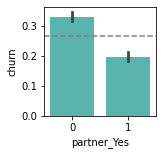


_____________________

paperless_billing_Yes 
_____________________

         chi2       p-value  degrees of freedom
0  256.874908  8.236203e-58                   1

observed:
 churn                     0     1   All
paperless_billing_Yes                  
0                      2395   469  2864
1                      2768  1400  4168
All                    5163  1869  7032

expected:
              0            1
0  2102.791809   761.208191
1  3060.208191  1107.791809


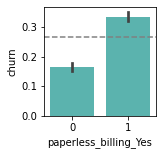


_____________________

churn 
_____________________

          chi2  p-value  degrees of freedom
0  7026.876495      0.0                   1

observed:
 churn     0     1   All
churn                  
0      5163     0  5163
1         0  1869  1869
All    5163  1869  7032

expected:
              0            1
0  3790.752133  1372.247867
1  1372.247867   496.752133


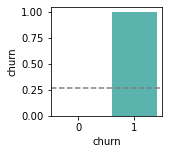


_____________________

online_security_Yes 
_____________________

         chi2       p-value  degrees of freedom
0  205.415787  1.374240e-46                   1

observed:
 churn                   0     1   All
online_security_Yes                  
0                    3443  1574  5017
1                    1720   295  2015
All                  5163  1869  7032

expected:
              0            1
0  3683.556741  1333.443259
1  1479.443259   535.556741


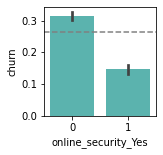


_____________________

online_backup_Yes 
_____________________

        chi2       p-value  degrees of freedom
0  47.246659  6.259257e-12                   1

observed:
 churn                 0     1   All
online_backup_Yes                  
0                  3261  1346  4607
1                  1902   523  2425
All                5163  1869  7032

expected:
              0            1
0  3382.528584  1224.471416
1  1780.471416   644.528584


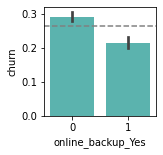


_____________________

device_protection_Yes 
_____________________

        chi2       p-value  degrees of freedom
0  30.495699  3.346075e-08                   1

observed:
 churn                     0     1   All
device_protection_Yes                  
0                      3290  1324  4614
1                      1873   545  2418
All                    5163  1869  7032

expected:
              0            1
0  3387.668089  1226.331911
1  1775.331911   642.668089


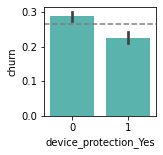


_____________________

tech_support_Yes 
_____________________

         chi2       p-value  degrees of freedom
0  189.966754  3.232868e-43                   1

observed:
 churn                0     1   All
tech_support_Yes                  
0                 3433  1559  4992
1                 1730   310  2040
All               5163  1869  7032

expected:
              0            1
0  3665.201365  1326.798635
1  1497.798635   542.201365


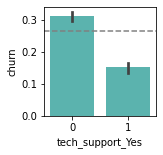


_____________________

payment_Bank transfer 
_____________________

        chi2       p-value  degrees of freedom
0  97.494125  5.401629e-23                   1

observed:
 churn                     0     1   All
payment_Bank transfer                  
0                      3879  1611  5490
1                      1284   258  1542
All                    5163  1869  7032

expected:
              0            1
0  4030.840444  1459.159556
1  1132.159556   409.840444


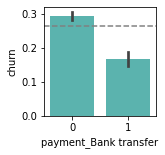


_____________________

payment_Credit card 
_____________________

         chi2       p-value  degrees of freedom
0  126.824843  2.029148e-29                   1

observed:
 churn                   0     1   All
payment_Credit card                  
0                    3874  1637  5511
1                    1289   232  1521
All                  5163  1869  7032

expected:
              0            1
0  4046.258959  1464.741041
1  1116.741041   404.258959


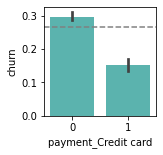


_____________________

payment_Electronic check 
_____________________

         chi2        p-value  degrees of freedom
0  637.588697  1.117802e-140                   1

observed:
 churn                        0     1   All
payment_Electronic check                  
0                         3869   798  4667
1                         1294  1071  2365
All                       5163  1869  7032

expected:
              0            1
0  3426.581485  1240.418515
1  1736.418515   628.581485


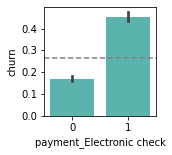


_____________________

payment_Mailed check 
_____________________

        chi2       p-value  degrees of freedom
0  57.452966  3.461589e-14                   1

observed:
 churn                    0     1   All
payment_Mailed check                  
0                     3867  1561  5428
1                     1296   308  1604
All                   5163  1869  7032

expected:
              0            1
0  3985.319113  1442.680887
1  1177.680887   426.319113


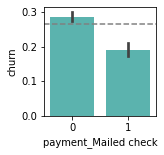


_____________________

internet_service_DSL 
_____________________

         chi2       p-value  degrees of freedom
0  107.779874  3.003509e-25                   1

observed:
 churn                    0     1   All
internet_service_DSL                  
0                     3206  1410  4616
1                     1957   459  2416
All                   5163  1869  7032

expected:
              0            1
0  3389.136519  1226.863481
1  1773.863481   642.136519


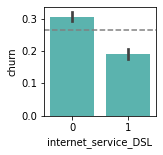


_____________________

internet_service_Fiber optic 
_____________________

         chi2        p-value  degrees of freedom
0  663.356457  2.782210e-146                   1

observed:
 churn                            0     1   All
internet_service_Fiber optic                  
0                             3364   572  3936
1                             1799  1297  3096
All                           5163  1869  7032

expected:
              0            1
0  2889.870307  1046.129693
1  2273.129693   822.870307


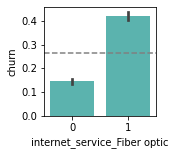


_____________________

internet_service_None 
_____________________

         chi2       p-value  degrees of freedom
0  362.947849  6.422521e-81                   1

observed:
 churn                     0     1   All
internet_service_None                  
0                      3756  1756  5512
1                      1407   113  1520
All                    5163  1869  7032

expected:
              0            1
0  4046.993174  1465.006826
1  1116.006826   403.993174


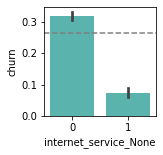


_____________________

contract_Month-to-month 
_____________________

          chi2        p-value  degrees of freedom
0  1149.104315  7.023468e-252                   1

observed:
 churn                       0     1   All
contract_Month-to-month                  
0                        2943   214  3157
1                        2220  1655  3875
All                      5163  1869  7032

expected:
              0            1
0  2317.916809   839.083191
1  2845.083191  1029.916809


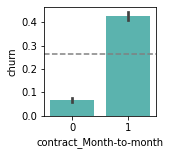


_____________________

contract_One year 
_____________________

         chi2       p-value  degrees of freedom
0  222.374968  2.743815e-50                   1

observed:
 churn                 0     1   All
contract_One year                  
0                  3857  1703  5560
1                  1306   166  1472
All                5163  1869  7032

expected:
              0            1
0  4082.235495  1477.764505
1  1080.764505   391.235495


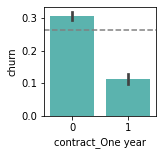


_____________________

contract_Two year 
_____________________

         chi2        p-value  degrees of freedom
0  637.848351  9.815072e-141                   1

observed:
 churn                 0     1   All
contract_Two year                  
0                  3526  1821  5347
1                  1637    48  1685
All                5163  1869  7032

expected:
              0            1
0  3925.847696  1421.152304
1  1237.152304   447.847696


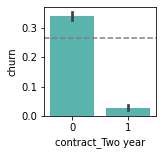


_____________________

total_charges 
____________________



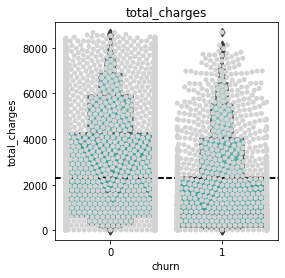

        count         mean          std    min      25%      50%       75%  \
churn                                                                        
0      5163.0  2555.344141  2329.456984  18.80  577.825  1683.60  4264.125   
1      1869.0  1531.796094  1890.822994  18.85  134.500   703.55  2331.300   

           max  
churn           
0      8672.45  
1      8684.80   


Mann-Whitney Test:
 MannwhitneyuResult(statistic=6288982.0, pvalue=1.9959848938845826e-84)

____________________

tenure 
____________________



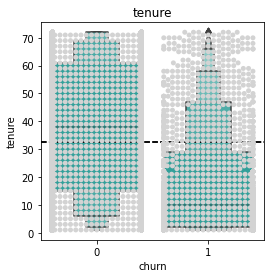

        count       mean        std  min   25%   50%   75%   max
churn                                                           
0      5163.0  37.650010  24.076940  1.0  15.0  38.0  61.0  72.0
1      1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=7154668.0, pvalue=6.043046580882717e-211)

____________________

monthly_charges 
____________________



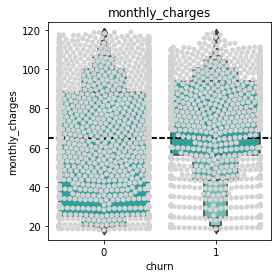

        count       mean        std    min    25%    50%     75%     max
churn                                                                   
0      5163.0  61.307408  31.094557  18.25  25.10  64.45  88.475  118.75
1      1869.0  74.441332  24.666053  18.85  56.15  79.65  94.200  118.35 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=3663498.5, pvalue=8.467195044548749e-54)

____________________



In [38]:
categ = df.nunique()[df.nunique() <= 5].index
cat_vars = list(categ)
quant_vars = ['total_charges', 'tenure', 'monthly_charges']
explore.explore_bivariate(df, 'churn', cat_vars, quant_vars)

Going through and checking to grab features who have extreme lows or highs to test as secondary models(if i have time)

dropping the features who's gap is not that big smaller than roughly .2 difference
- drop dsl
- mailed check
- bank transfers
- device_protection_yes
- online backup_yes
- partner_Yes

In [39]:
df = df.drop(columns=['internet_service_DSL',
                      'payment_Mailed check',
                      'payment_Bank transfer',
                      'device_protection_Yes',
                      'online_backup_Yes',
                      'partner_Yes'])

In [41]:
# From 20 features to 14. This will be another model if there is time
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tenure                        7032 non-null   int64  
 1   monthly_charges               7032 non-null   float64
 2   total_charges                 7032 non-null   float64
 3   paperless_billing_Yes         7032 non-null   uint8  
 4   churn                         7032 non-null   uint8  
 5   online_security_Yes           7032 non-null   uint8  
 6   tech_support_Yes              7032 non-null   uint8  
 7   payment_Credit card           7032 non-null   uint8  
 8   payment_Electronic check      7032 non-null   uint8  
 9   internet_service_Fiber optic  7032 non-null   uint8  
 10  internet_service_None         7032 non-null   uint8  
 11  contract_Month-to-month       7032 non-null   uint8  
 12  contract_One year             7032 non-null   uint8  
 13  con

### Are churned customers total_charges greater than the average total charges?

$H_0$: Churned customers total_charges is equal or less than the average total charges<b>(t<0)</b><br>
$H_a$: Churned customers total_charges is greater than the average total charges<b>(t>0)</b>

In [48]:
alpha = .05

In [49]:
charges = df[df['churn'] == 1].total_charges
μ = df.total_charges.mean()

t, p = stats.ttest_1samp(charges, μ) #1samp, 1 tailed, not independent
t, p

(-17.182457263856282, 1.499685218013115e-61)

In [51]:
if (p< alpha):
    print("reject Null Hypothesis")
elif(t > 0):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypthesis")

reject Null Hypothesis


### Are churned customers monthly_charges greater than the average monthly charges?

$H_0$: Churned customers total_charges is equal or less than the average total charges<b>(t<0)</b><br>
$H_a$: Churned customers total_charges is greater than the average total charges<b>(t>0)</b>

In [52]:
charges = df[df['churn'] == 1].monthly_charges
μ = df.monthly_charges.mean()

t, p = stats.ttest_1samp(charges, μ) #1samp, 1 tailed, not independent
t, p

(16.901402342895995, 9.602639778944957e-60)

In [57]:
if (p/2< alpha):
    print("reject Null Hypothesis")
elif(t > 0):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypthesis")

reject Null Hypothesis


### notes from Ryan 
If p/2 < alpha and t < 0: reject the null 

### Are churned customers tenure less than the average tenure?

$H_0$: Churned customers tenure is greater than or equal than the average total charges<b>(t>0)</b><br>
$H_a$: Churned customers tenure is less than the average tenure<b>(t<0)</b>

In [58]:
charges = df[df['churn'] == 1].tenure
μ = df.tenure.mean()

t, p = stats.ttest_1samp(charges, μ) #1samp, 1 tailed, not independent
t, p

(-31.96865819544077, 3.017131174781332e-179)

In [59]:
if (p< alpha):
    print("reject Null Hypothesis")
elif(t < 0):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypthesis")

reject Null Hypothesis


### Are customers who churn average total charges higher than average total charges of those who do not churn?

$H_0$: Churned customers average total_charges is less than or equal to average total charges not churned customers <b>(t<0)</b><br>
$H_a$: Churned customers average total_charges is greather than average total charges not churned customers <b>(t>0)</b>

In [66]:

churned = df[df['churn'] == 1].total_charges
not_churned = df[df['churn'] == 0].total_charges

t, p = stats.mannwhitneyu(churned, not_churned)
t, p

(3360665.0, 9.979924469422913e-85)

In [67]:
if (p< alpha):
    print("reject Null Hypothesis")
elif(t > 0):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypthesis")

reject Null Hypothesis


### Are customers who churn average tenure less than the average tenure of those who do not churn?

$H_0$: Customers who churn average tenure greater than or equal the average tenure of those who do not churn.<br>
$H_a$: Customers who churn average tenure less than the average tenure of those who do not churn.

In [141]:
df = clean_telco(get_telco_data())
churned = df[df['churn'] == 1].tenure
not_churned = df[df['churn'] == 0].tenure

t, p = stats.mannwhitneyu(churned, not_churned)
t, p

(2494979.0, 3.0215232904413584e-211)

In [143]:
if (p< alpha):
    print("reject Null Hypothesis")
elif(t < 0):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypthesis")

reject Null Hypothesis
